# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

# Introduction: 
In this project the hope is to understand which is a better plan as well as the more profitable. Through this analysis the goal is to gain insight into the calling, messaging and internet usage habits for customers on each respective plan. Initially will load and perform exploratory data analysis on all the dataframes checking the data types, ensuring correct table format and checking for missing and duplicate values. Then statistical data analysis will be performed and the necessary plots drawn up to best visualise the analysed data. 

## Initialization

In [1]:
# Loading all the necessary libraries
import pandas as pd 
import math 
import numpy as np 
import seaborn as sns
from scipy import stats as st 
from math import factorial 
from matplotlib import pyplot as plt 
from scipy.stats import ttest_ind

## Loading the data

In [2]:
# Loaded the data files into different DataFrames
df_calls = pd.read_csv('/Users/micha/Downloads/megaline_calls.csv') #call information dataframe
df_internet = pd.read_csv('/Users/micha/Downloads/megaline_internet.csv') #internet information dataframe 
df_messages = pd.read_csv('/Users/micha/Downloads/megaline_messages.csv') # message information dataframe
df_plans = pd.read_csv('/Users/micha/Downloads/megaline_plans.csv') # plan information dataframe 
df_users = pd.read_csv('/Users/micha/Downloads/megaline_users.csv') # user information dataframe 

## Date Preprocessing: 

### Introduction: 
Initially loaded the data and checked the various dataframes for missing and duplicate values with for loops then used the 'info()' and 'sample()' methods to get a better overall picture of the data itself, the hope is to find and correct any data that needs correcting and update the dataframes to be a more accurate representation of the user information. 

In [3]:
# loaded the data for each datatframe and got an overview of the table
df_calls.head() 

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [8]:
# made a df_names variable to print the names of each df within loop 
df_names = ['df_calls', 'df_internet', 'df_messages', 'df_plans', 'df_users']
# made a dfs variable with all data frames for easier analysis 
dfs = [df_calls, df_internet, df_messages, df_plans, df_users]
# wrote a for loop to check general info 
for name, df in zip(df_names, dfs):
    print(f'General Info for {name}:')
    print(df.info())
    print('-' * 65)

General Info for df_calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
-----------------------------------------------------------------
General Info for df_internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
-------------

In [9]:
#wrote a for loop to check missing values 
for name, df in zip(df_names, dfs):
    print(f"Missing Values for {name}:")
    print(df.isna().sum())
    print("-" * 40)

Missing Values for df_calls:
id           0
user_id      0
call_date    0
duration     0
dtype: int64
----------------------------------------
Missing Values for df_internet:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
----------------------------------------
Missing Values for df_messages:
id              0
user_id         0
message_date    0
dtype: int64
----------------------------------------
Missing Values for df_plans:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
----------------------------------------
Missing Values for df_users:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
----------------------------------------


In [10]:
for name, df in zip(df_names, dfs):
    print(f'Duplicate Values for {name}:')
    print(df.duplicated().sum())
    print('-' * 30)

Duplicate Values for df_calls:
0
------------------------------
Duplicate Values for df_internet:
0
------------------------------
Duplicate Values for df_messages:
0
------------------------------
Duplicate Values for df_plans:
0
------------------------------
Duplicate Values for df_users:
0
------------------------------


### Conclusions on preparing the data: ###
- Can see that the datasets did not need any editing and that the column names were in order. 
- After running basic checks for duplicates and missing values can see there aren't any duplicates and hardly any missing values. 
- There are missing values for the churn date column in the users dataframe, however this is not going to negatively impact our data as there will only be a churn date if a user has ended their use of the service and the missing values indicate that the service is still in use. 

## Plans Dataframe:

In [11]:
# Printed a sample of data for plans
df_plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


**Notes on plans dataframe:**
- The dataframe is only two rows with all the information on the cost of the plans and additional charges over the plan limits.
- In our information for the plans we see that the 'surf' plan includes 15 GB (gigabytes) of data and the 'ultimate' plan includes 30 GB this is a problem because currently it's measured in MB (megabytes) and doesn't give an accurate measurement of the data included in each plan. 
- Other than the measurement for included mobile data everything else is in order. 

### Fixing the Plans Dataframe:

**Note:**
Used the 'replace()' function to convert the values from MB to GB and ensuring the values included with each plan are correct

In [12]:
df_plans = df_plans.replace({30720: 30, 15360: 15})
df_plans 

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


### Enriching the Plans Dataframe:

**Note:**
Used the 'rename()' function to change the column name from 'mb_per_month_included' to 'gb_per_month_in

In [13]:
df_plans = df_plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'})
df_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Users Dataframe:

In [14]:
# Print a sample of data for users
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
223,1223,Patience,Wilson,37,"Phoenix-Mesa-Chandler, AZ MSA",2018-07-05,surf,NaN
20,1020,Rutha,Bell,56,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-08,surf,NaN
355,1355,Digna,Tyson,57,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-07,surf,NaN
405,1405,Shella,Hunter,34,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-22,ultimate,NaN
389,1389,Earleen,Glass,18,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-05-06,ultimate,NaN


In [15]:
#getting a count for 'surf' plan users
surf_users = df_users[df_users['plan'] == 'surf'].count()
surf_users

user_id       339
first_name    339
last_name     339
age           339
city          339
reg_date      339
plan          339
churn_date     23
dtype: int64

In [16]:
#getting a count for 'ultimate' plan users
ultimate_users = df_users[df_users['plan'] == 'ultimate'].count()
ultimate_users

user_id       161
first_name    161
last_name     161
age           161
city          161
reg_date      161
plan          161
churn_date     11
dtype: int64

**Notes on users dataframe:**
- The summary we gained from the 'info()' method shows us that we have the information for the 500 customers which corresponds with the information about the dataset. 
- Also ran a check to see the total amount of ultimate and surf users with 161 ultimate users, and 339 users of the surf plan. This may lead to some differences in revenue for each plan and usage from users of each plan.
- Can see that 'reg_date' and 'churn_date' are both 'object' datatypes and need to be converted for easier analysis later on. 
- The data contains information on the user, their city and registration date. 
- As mentioned before the missing values in churn date are not going to have any kind of adverse effect on our data as the churn date is only recorded if the user cancels their subscription to the service. 


### Fixing the User Data:

**Note:** 
Used 'astype()' method to convert the 'user_id' column from 'int64' to 'object' type as we wont need to work with the 'user_id' as numerical values. 

In [17]:
df_users['user_id'] = df_users['user_id'].astype(object)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    object
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


### Enriching the User Data:

**Note:**
Used 'pd.to_datetime()' to convert 'reg_date' and 'churn_date' to datetime type to make it easier to work with if needed.

In [18]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


In [19]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


## Calls Dataframe: 

In [20]:
# Printed a sample of data for calls
df_calls.sample(5)

,id,user_id,call_date,duration
14148,1059_375,1059,2018-05-30,6.41
46260,1167_343,1167,2018-07-20,12.90
48538,1174_515,1174,2018-11-08,4.69
8772,1041_207,1041,2018-06-20,16.62
84759,1312_251,1312,2018-05-18,7.07


**Notes on calls dataframe:**
- Can see from the summary from 'info()' that it doesn't contain any hidden missing values.
- Can see that the 'churn_date' column is an object datatype and will need to be converted to datetime for easier analysis later on.
- Can assume that from our dataset of 500 people and the calls being around 138000, that each user has made many calls.
- Also contains the duration of each call which will be good for call data analysis later on.

### Fixing the Call Data:

**Note:** 
Converted the 'user_id' column from 'int64' to 'object' datatype.

In [21]:
df_calls['user_id'] = df_calls['user_id'].astype(object)
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  object 
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.2+ MB


### Enriching the Call Data:

**Note:**
Converted 'call_date' to datetime using 'pd.to_datetime()' for easier processing later on. Rounded the call duration up to the nearest minute using 'np.ceil' as per the guidlines set by megaline. 

In [22]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


In [23]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


## Messages Dataframe: 

In [24]:
# Printed a sample of data for messages
df_messages.sample(5)

,id,user_id,message_date
47494,1324_209,1324,2018-12-24
38529,1253_63,1253,2018-09-17
39375,1256_59,1256,2018-11-01
59029,1374_203,1374,2018-12-06
54239,1343_330,1343,2018-12-12


**Notes on messages dataframe:**
- Can see from our summary using the 'info()' method that users typically make more phone calls than they send messages which is not necessarily what one might expect. 
- The dataframe contains the message and user ID which may be useful for analysis with the messages later on.
- Can also see that 'message_date' is stored as an 'object' datatype and will need to be converted to datetime for easier calculations later on. 

### Fixing the Message Data:

**Note:**
Converted 'user_id' to 'object' datatype as we won't need to perform numerical operations with an ID number.

In [25]:
df_messages['user_id'] = df_messages['user_id'].astype(object) 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  object
 2   message_date  76051 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


### Enriching the Message Data:

**Note:** 
Converted 'message_date' from 'object' datatype to 'datetime64' for easier analysis later on. 

In [26]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


## Internet Dataframe: 

In [27]:
# Printed a sample of data for the internet traffic
df_internet.sample(5)

,id,user_id,session_date,mb_used
97701,1460_339,1460,2018-08-04,176.13
22869,1106_48,1106,2018-08-08,210.80
52522,1236_389,1236,2018-07-07,391.95
86878,1403_226,1403,2018-10-11,262.11
7015,1039_290,1039,2018-07-11,47.94


**Notes on internet dataframe:**
- See from the summary created using 'info()' that the total number of internet uses for our 500 users shows they use the internet less than they make phone calls but more than they text.
- The 'session_month' column is stored as an 'object' datatype and should be converted to 'datetime64' for easier analysis. 
- Can see that the data used is stored as MB and needs to be converted to GB to keep in line with our plan information which has the included data measured in GB. After, converting it from MB to GB need to change the 'mb_used' column to 'gb_used' column. 

### Fixing Internet Data:

**Note:**
Converted 'user_id' to 'object' as we wont need to perform numerical operations with an ID number. 

In [28]:
df_internet['user_id'] = df_internet['user_id'].astype(object)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  object 
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


**Note:** 
- Renamed the 'mb_used' to 'gb_used' with 'rename()' function.
- Converted the values in the now 'gb_used' column from MB to GB by dividing the values by 1000 for more concise and less confusing analysis later on. 

In [29]:
df_internet = df_internet.rename(columns={'mb_used': 'gb_used'}) 
df_internet.head()

,id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [30]:
df_internet['gb_used'] = df_internet['gb_used'] / 1000
df_internet

# converted data from MB to GB
# will convert to Megaline specifications for data usage when finding the monthly usage for each user

,id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,0.08986
1,1000_204,1000,2018-12-31,0.00000
2,1000_379,1000,2018-12-28,0.66040
3,1000_413,1000,2018-12-26,0.27099
4,1000_442,1000,2018-12-27,0.88022
...,...,...,...,...
104820,1499_215,1499,2018-10-20,0.21806
104821,1499_216,1499,2018-12-30,0.30472
104822,1499_217,1499,2018-09-22,0.29275
104823,1499_218,1499,2018-12-07,0.00000


### Enriching Internet Data:

**Note:** 
Converted 'session_date' column from 'object' datatype to 'datetime64' for easier analysis later on.

In [31]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Dataframe Preperation Conclusions: 
- Checked for missing and duplicate values and all appear to be free of missing or duplicate values with the exception of the 'churn_date' column in the users dataframe, the churn date is indicative of a user stopping their subscription to the plan.
- We can see that only 34 of our 500 users during the year 2018 stopped their use of the service which is a good indicator of customer satisfaction with both data plans. 
- Converted all the 'user_id' columns in each dataframe to 'object' datatypes for easier analysis.
- Converted all dates to 'datetime64' datatype in each dataframe for easier data analysis.
- Converted the values in 'mb_used' column in the internet dataframe to gigabytes and changed the column name to 'gb_used'. 
- Will round up to the data usage to match Megaline's specifications when calculating the monthly data usage for each user as individual internet sessions are not rounded but the monthly usage is rounded up if above 1024 MB

## Studying the  Plan Conditions:

 **NOTE**
 It is critical to understand how the plans work, how users are charged based on their plan subscription. Printed the plan information to review before analysis.

In [32]:
# Printed out the plan conditions 
df_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


In [33]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


## Aggregating the Data per User:

### Introduction: 
When it comes to aggregating the data we want to group by month the total amount of calls, call minutes, the amount of text messages sent and the total amount of data used by each user. As well as adding the city of the user, their plan information and monthly revenue. Will need to double check for missing and duplicate data as a result of merging all of these various dataframes together. Will later split the usage data into different dataframes based on call, message and data usage to make checking for duplicates and missing values easier 

In [34]:
# Calculated the number of calls made by each user per month. 
df_calls['call_month'] = df_calls['call_date'].dt.to_period('M')
calls_per_month = df_calls.groupby(['user_id', 'call_month']).size().reset_index(name='calls')
calls_per_month.head()
# grouped the calls by month using 'dt.to_period('M')' and stored in the new column 'call_month'
# used 'groupby()' to group by 'user_id' and 'call_month' and stored in new variable 'calls_per_month'
# used 'head()' to verify the new variable works and see that total calls per month for each user is stored correctly. 

,user_id,call_month,calls
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [35]:
# Calculated the amount of minutes spent by each user per month. 
minutes_per_month = df_calls.groupby(['user_id', 'call_month'])['duration'].sum().reset_index(name='minutes')
minutes_per_month.head()

# grouped calls by 'user_id', 'call_month' and added 'duration' column into new variable 'minutes_per_month'
# used 'sum()' to count the total minutes of all the phone calls for each user by month and 'reset_index(name='minutes')' to add the total minutes column 

,user_id,call_month,minutes
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0


In [36]:
# Calculated the number of messages sent by each user per month. 
df_messages['message_month'] = df_messages['message_date'].dt.to_period('M')
messages_per_month = df_messages.groupby(['user_id', 'message_month']).size().reset_index(name='messages')
messages_per_month.head()

# grouped the messages by month using 'dt.to_period('M')' and saved in new column 'message_month'.
# used 'groupby()' with 'user_id' and 'message_month' in combination with 'size()' and 'reset_index(name='messages')' 
# creates new variable 'messages_per_month' which has the total messages for each user stored within it

,user_id,message_month,messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [37]:
# Calculated the volume of internet traffic used by each user per month. 
df_internet['session_month'] = df_internet['session_date'].dt.to_period('M')
traffic_per_month = df_internet.groupby(['user_id', 'session_month',])['gb_used'].sum().reset_index(name='data_used')

def rounded_data(x, decimal_threshold=.024, numerical_threshold=1.0):
    if x - int(x) >= decimal_threshold and x >= numerical_threshold:
        return round(x, 0)
    else: 
        return x 

traffic_per_month['data_used'] = traffic_per_month['data_used'].apply(rounded_data)
traffic_per_month.sample(10)

# rounded the monthly internet usage up to the next highest GB if above the threshold of 1.024 GB as per Megalines instruction
# wrote a new function with 'def' to round up if above 1.024 GB 
# to avoid rounding unecessarily added a decimal threshold for numbers bigger than 1 that are under the data usage threshold e.g. 13.001 should round down to 13.0
# grouped data usage sessions by month using 'dt.to_period('M')' and saved in new column 'session_month'
# used 'groupby()' to get a new variable with 'user_id' and 'session_month' with the 'gb_used' for each user
# used 'sum()' to get the total amount of data used by each user per month and used 'reset_index()' to store the results in the 'data_used' column

,user_id,session_month,data_used
957,1199,2018-09,16.00000
737,1155,2018-06,21.00000
1002,1210,2018-08,12.00000
82,1022,2018-12,18.00000
1605,1349,2018-10,13.00000
833,1173,2018-12,22.00000
72,1020,2018-11,12.00034
254,1059,2018-06,11.00000
781,1163,2018-10,20.00000
828,1172,2018-11,26.00000


**NOTE**
Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [38]:
# Merged the data for calls, minutes, messages, internet based on user_id and month
usage_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'call_month'], how='outer')
usage_data = pd.merge(usage_data, messages_per_month, left_on=['user_id', 'call_month'], right_on=['user_id', 'message_month'], how='outer')
usage_data = pd.merge(usage_data, traffic_per_month, on='user_id', how='outer')
usage_data.head()

#used 'pd.merge()' to merge all of the above aggregated data into one dataframe 'usage_data'

,user_id,call_month,calls,minutes,message_month,messages,session_month,data_used
0,1000,2018-12,16.0,124.0,2018-12,11.0,2018-12,2.0
1,1001,2018-08,27.0,182.0,2018-08,30.0,2018-08,7.0
2,1001,2018-08,27.0,182.0,2018-08,30.0,2018-09,13.0
3,1001,2018-08,27.0,182.0,2018-08,30.0,2018-10,22.0
4,1001,2018-08,27.0,182.0,2018-08,30.0,2018-11,19.0


In [39]:
# Add the plan information
usage_data = pd.merge(usage_data, df_users[['user_id', 'plan', 'city']], on='user_id', how='left')
usage_data.head()

# used 'pd.merge()' to add the plan and city information of each user 

,user_id,call_month,calls,minutes,message_month,messages,session_month,data_used,plan,city
0,1000,2018-12,16.0,124.0,2018-12,11.0,2018-12,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08,27.0,182.0,2018-08,30.0,2018-08,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-08,27.0,182.0,2018-08,30.0,2018-09,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-08,27.0,182.0,2018-08,30.0,2018-10,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-08,27.0,182.0,2018-08,30.0,2018-11,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"


 **NOTE:**
 
 Calculated the monthly revenue from each user; subtracted the free package limit from the total number of calls, text messages, and data; multiplied the result by the calling plan value; added the monthly charge depending on the calling plan

In [40]:
def calculate_monthly_revenue(row):
    revenue = 0 
    plan = row['plan']
    calls_sum = row['minutes']
    messages_count = row['messages']
    data_used = row['data_used'] 
    
    difference_calls = calls_sum - int(df_plans[df_plans['plan_name'] == plan]['minutes_included'])
    difference_messages = messages_count - int(df_plans[df_plans['plan_name'] == plan]['messages_included'])
    difference_data = data_used - int(df_plans[df_plans['plan_name'] == plan]['gb_per_month_included'])
    
    if (difference_calls > 0): 
        revenue += difference_calls * int(df_plans[df_plans['plan_name'] == plan]['usd_per_minute'])
    if (difference_messages > 0): 
        revenue += difference_messages * int(df_plans[df_plans['plan_name'] == plan]['usd_per_message'])
    if (difference_data > 0): 
        revenue += difference_data * int(df_plans[df_plans['plan_name'] == plan]['usd_per_gb'])
        
    revenue += int(df_plans[df_plans['plan_name'] == plan]['usd_monthly_pay'])
    return revenue 

usage_data['monthly_revenue'] = usage_data.apply(calculate_monthly_revenue, axis=1)
usage_data

# wrote a custom function using 'def' to calculate the monthly revenue 
# first subtracted the message, call and data count from the included messages, minutes and data 
# then used 'if' statements to multiply any rows within our dataframe where messages, minutes and data exceeded the plan limit by the charge associated with each plan
# used '.apply()' method and created a new column 'monthly_revenue'

C:\Users\micha\AppData\Local\Temp\ipykernel_12020\3650408903.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  difference_calls = calls_sum - int(df_plans[df_plans['plan_name'] == plan]['minutes_included'])
C:\Users\micha\AppData\Local\Temp\ipykernel_12020\3650408903.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  difference_messages = messages_count - int(df_plans[df_plans['plan_name'] == plan]['messages_included'])
C:\Users\micha\AppData\Local\Temp\ipykernel_12020\3650408903.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  difference_data = data_used - int(df_plans[df_plans['plan_name'] == plan]['gb_per_month_included'])
C:\Users\micha\AppData\Local\Temp\ipykernel_12020\3650408903.py:19: Future

,user_id,call_month,calls,minutes,message_month,messages,session_month,data_used,plan,city,monthly_revenue
0,1000,2018-12,16.0,124.0,2018-12,11.0,2018-12,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
1,1001,2018-08,27.0,182.0,2018-08,30.0,2018-08,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0
2,1001,2018-08,27.0,182.0,2018-08,30.0,2018-09,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0
3,1001,2018-08,27.0,182.0,2018-08,30.0,2018-10,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.0
4,1001,2018-08,27.0,182.0,2018-08,30.0,2018-11,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.0
...,...,...,...,...,...,...,...,...,...,...,...
14802,1499,2018-11,45.0,308.0,NaT,NaN,2018-12,22.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",90.0
14803,1499,2018-12,65.0,496.0,NaT,NaN,2018-09,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",20.0
14804,1499,2018-12,65.0,496.0,NaT,NaN,2018-10,19.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",60.0
14805,1499,2018-12,65.0,496.0,NaT,NaN,2018-11,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",40.0


**Note:** 
Can see that after we've aggregated all the data that there are clearly some duplicate values and presumably some missing values as well. Need to clean up the 'usage_data' dataframe and make sure that the duplicates or missing values aren't going to have an adverse effect on our data and statistical ananlysis later on.

In [41]:
duplicate_mv_free_usage_data = usage_data
duplicate_mv_free_usage_data.isna().sum()

# added new dataframe 'duplicate_mv_free_usage_data' for our cleaned 'usage_data' dataframe ('mv' - missing values)

user_id               0
call_month          168
calls               168
minutes             168
message_month      3462
messages           3462
session_month         8
data_used             8
plan                  0
city                  0
monthly_revenue       0
dtype: int64

In [42]:
duplicate_mv_free_usage_data.dropna(inplace=True)
duplicate_mv_free_usage_data.isna().sum()

# dropping missing values with 'dropna()'

user_id            0
call_month         0
calls              0
minutes            0
message_month      0
messages           0
session_month      0
data_used          0
plan               0
city               0
monthly_revenue    0
dtype: int64

In [43]:
duplicate_mv_free_usage_data.duplicated(subset=['user_id', 'call_month', 'calls', 'minutes', 'message_month', 'messages', 'session_month', 'data_used', 'plan', 'monthly_revenue']).duplicated().sum()

# checking for duplicate values in our data using 'duplicated()' and 'sum()'

np.int64(11169)

**Note:**
Opted to drop all missing values as these only arose as a result of combining all the individual dataframes and shouldn't affect the data significantly by dropping them. Can see their are duplicate rows in all the columns with the important values and need to be cleaned for better analysis in the future. When working with such a large dataframe it's easier visually and analytically to split it into smaller dataframes then work on cleaning each of those smaller dataframes and avoid the many errors in data cleaning that may occur as a result of trying to work on the dataframe by itself. Split the usage data into call(minutes), messages and data usage dataframes.

In [44]:
duplicate_mv_free_calls = duplicate_mv_free_usage_data.loc[:, ['user_id', 'call_month', 'calls', 'minutes', 'plan', 'city', 'monthly_revenue']]
duplicate_mv_free_calls.head()

# created new dataframe 'duplicate_mv_free_calls' to store call usage data that we'll clean of duplicate values

,user_id,call_month,calls,minutes,plan,city,monthly_revenue
0,1000,2018-12,16.0,124.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
1,1001,2018-08,27.0,182.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0
2,1001,2018-08,27.0,182.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0
3,1001,2018-08,27.0,182.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.0
4,1001,2018-08,27.0,182.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.0


In [45]:
duplicate_mv_free_messages = duplicate_mv_free_usage_data.loc[:, ['user_id', 'message_month', 'messages', 'plan', 'city', 'monthly_revenue']]
duplicate_mv_free_messages

,user_id,message_month,messages,plan,city,monthly_revenue
0,1000,2018-12,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
1,1001,2018-08,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0
2,1001,2018-08,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0
3,1001,2018-08,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.0
4,1001,2018-08,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.0
...,...,...,...,...,...,...
14665,1496,2018-12,11.0,surf,"New Orleans-Metairie, LA MSA",30.0
14666,1496,2018-12,11.0,surf,"New Orleans-Metairie, LA MSA",20.0
14667,1496,2018-12,11.0,surf,"New Orleans-Metairie, LA MSA",20.0
14668,1496,2018-12,11.0,surf,"New Orleans-Metairie, LA MSA",30.0


In [46]:
duplicate_mv_free_internet = duplicate_mv_free_usage_data.loc[:, ['user_id', 'data_used', 'session_month', 'plan']]
duplicate_mv_free_internet

# created new dataframe 'duplicate_mv_free_data_usage' to store monthly internet usage 

,user_id,data_used,session_month,plan
0,1000,2.0,2018-12,ultimate
1,1001,7.0,2018-08,surf
2,1001,13.0,2018-09,surf
3,1001,22.0,2018-10,surf
4,1001,19.0,2018-11,surf
...,...,...,...,...
14665,1496,16.0,2018-09,surf
14666,1496,14.0,2018-10,surf
14667,1496,9.0,2018-11,surf
14668,1496,16.0,2018-12,surf


In [47]:
duplicate_mv_free_revenue = duplicate_mv_free_usage_data.loc[:, ['user_id', 'city', 'plan', 'monthly_revenue']]
duplicate_mv_free_revenue

# created new dataframe 'duplicate_mv_free_revenue' to store just the revenue information for each user 

,user_id,city,plan,monthly_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.0
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.0
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.0
...,...,...,...,...
14665,1496,"New Orleans-Metairie, LA MSA",surf,30.0
14666,1496,"New Orleans-Metairie, LA MSA",surf,20.0
14667,1496,"New Orleans-Metairie, LA MSA",surf,20.0
14668,1496,"New Orleans-Metairie, LA MSA",surf,30.0


In [48]:
dfs = [duplicate_mv_free_calls, duplicate_mv_free_internet, duplicate_mv_free_messages, duplicate_mv_free_revenue]
df_names = ['duplicate_mv_free_calls', 'duplicate_mv_free_internet', 'duplicate_mv_free_messages', 'duplicate_mv_free_data_usage']
for name, df in zip(df_names, dfs):
    print(f'Duplicate Values for {name}')
    print(df.duplicated().sum())
    print('-' * 45)

Duplicate Values for duplicate_mv_free_calls
5754
---------------------------------------------
Duplicate Values for duplicate_mv_free_internet
9388
---------------------------------------------
Duplicate Values for duplicate_mv_free_messages
5754
---------------------------------------------
Duplicate Values for duplicate_mv_free_data_usage
10210
---------------------------------------------


In [49]:
dfs = {
    'duplicate_mv_free_calls': (duplicate_mv_free_calls, ['user_id', 'call_month', 'calls', 'minutes', 'plan', 'city', 'monthly_revenue']),
    'duplicate_mv_free_messages': (duplicate_mv_free_messages, ['user_id', 'message_month', 'messages', 'plan', 'city', 'monthly_revenue']),
    'duplicate_mv_free_internet': (duplicate_mv_free_internet, ['user_id', 'data_used', 'session_month', 'plan']),
    'duplicate_mv_free_revenue': (duplicate_mv_free_revenue, ['user_id', 'city', 'plan', 'monthly_revenue'])
}
for name, (df, cols) in dfs.items():
    duplicate_free = df.drop_duplicates(subset=cols)
    dfs[name] = (duplicate_free, cols)
    print(f'{name} duplicates removed: {df.duplicated(subset=cols).sum()}')
    globals()[name] = duplicate_free 
    dfs[name] = (duplicate_free, cols)

duplicate_mv_free_calls duplicates removed: 5754
duplicate_mv_free_messages duplicates removed: 5754
duplicate_mv_free_internet duplicates removed: 9388
duplicate_mv_free_revenue duplicates removed: 10210


In [52]:
#wrote a loop to check that all duplicates have been dropped
dfs = [duplicate_mv_free_calls, duplicate_mv_free_internet, duplicate_mv_free_messages, duplicate_mv_free_revenue]
df_names = ['duplicate_mv_free_calls', 'duplicate_mv_free_internet', 'duplicate_mv_free_messages', 'duplicate_mv_free_data_usage']
for name, df in zip(df_names, dfs):
    print(f'Duplicate Values for {name}')
    print(df.duplicated().sum())
    print('-' * 45)

Duplicate Values for duplicate_mv_free_calls
0
---------------------------------------------
Duplicate Values for duplicate_mv_free_internet
0
---------------------------------------------
Duplicate Values for duplicate_mv_free_messages
0
---------------------------------------------
Duplicate Values for duplicate_mv_free_data_usage
0
---------------------------------------------


In [ ]:
surf_revenue = duplicate_mv_free_revenue[duplicate_mv_free_revenue['plan'] == 'surf']['monthly_revenue'].sum()
surf_revenue

# calculated the total revenue for the surf data plan

np.float64(435920.259)

In [ ]:
ultimate_revenue = duplicate_mv_free_revenue[duplicate_mv_free_revenue['plan'] == 'ultimate']['monthly_revenue'].sum()
ultimate_revenue

# calculated the total revenue for the ultimate revenue 

np.float64(266714.59045)

### Aggregated Data Conclusions: 
After aggregating the data by month for the calls, minutes, messages, the data used and calculating the monthly revenue for each user then removing the missing values we end up with the 'duplicate_mv_free_usage_data' dataframe. Merging all of our aggregated data together created some duplicates and missing values that weren't in the original dataframes. This means we had to clean the duplicates and missing values before we can continue with our analysis. Achieved this by splitting calls, messages and data usage into different dataframes and for further analysis need to keep in mind the fact that there are more users of the surf plan than the ultimate plan, which may skew the data. Also seperated the total revenue of the plans to get a better picture of the total revenue each one is bringing in we can see that the majority of the revenue is actually brought in from the surf plan. This is probably because of the 500 people who use Megalines services the majority of them use the surf plan and may exceed their plan limits more frequently although further analysis will be needed to confirm this. 

# Studying User Behaviour

## User Behaviour Introduction: 
The goal of studying the user behaviour is to calculate useful descriptive statistics to reveal a better picture of the data, while using plots to help us better visualise the plans and the profitability of each. Helping us to get closer to our goal of understanding which plan is more profitable overall and gaining better insight into the distribution of calls (in terms of volume and minutes), the messages sent per month and the data used per month of each plan respectively 

### Call Behaviour: 

In [ ]:
avg_monthly_call_duration = duplicate_mv_free_calls.groupby(['plan', 'call_month'])['minutes'].mean().reset_index()
avg_monthly_call_duration

# used 'groupby()' and 'mean()' functions to create a new dataframe 'avg_monthly_call_duration' 
# 'avg' meaning average, this df shows the average call duration for each month

,plan,call_month,minutes
0,surf,2018-01,292.000000
1,surf,2018-02,339.767857
2,surf,2018-03,352.909091
3,surf,2018-04,366.809942
4,surf,2018-05,456.660377
5,surf,2018-06,433.351575
6,surf,2018-07,469.824113
7,surf,2018-08,447.882214
8,surf,2018-09,450.067079
9,surf,2018-10,471.476323


In [ ]:
avg_monthly_calls_pivot = avg_monthly_call_duration.pivot(index='call_month', columns='plan', values='minutes')
avg_monthly_calls_pivot

# created a pivot table called 'avg_monthly_call_pivot' for easier analysis and plotting later on 

plan,surf,ultimate
call_month,,
2018-01,292.000000,197.666667
2018-02,339.767857,484.254545
2018-03,352.909091,423.383562
2018-04,366.809942,329.477419
2018-05,456.660377,414.264249
2018-06,433.351575,381.544262
2018-07,469.824113,454.347222
2018-08,447.882214,448.277372
2018-09,450.067079,447.812367


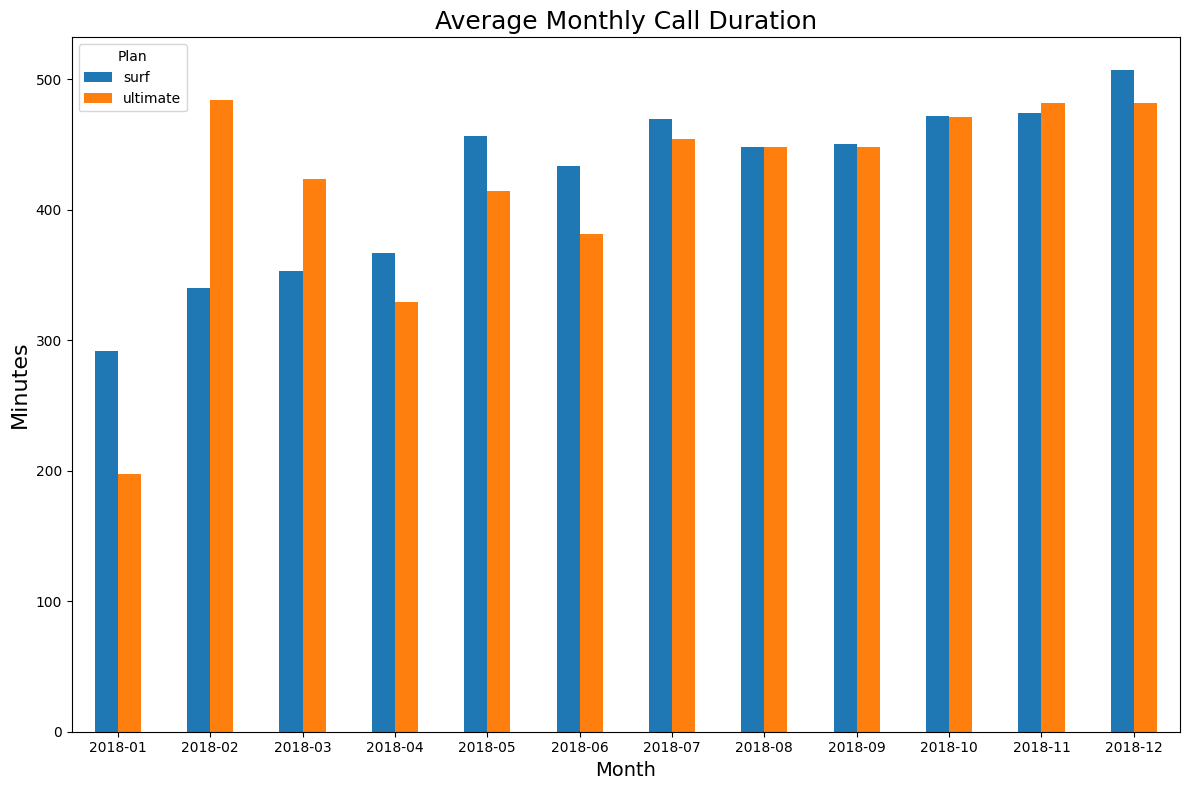

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
avg_monthly_calls_pivot.plot(kind='bar', ax=ax)
plt.title('Average Monthly Call Duration', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Minutes', fontsize=16) 
plt.xticks(rotation=0)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

# created a bar plot to visualise the average monthly call duration 

In [ ]:
# Comparing the number of minutes users of each plan require each month.
no_of_minutes_per_plan = duplicate_mv_free_calls.groupby(['plan', 'call_month'])['minutes'].sum().reset_index()
no_of_minutes_per_plan

# used 'groupby()' and 'sum()' to get the total minutes per month of each plan 

,plan,call_month,minutes
0,surf,2018-01,3504.0
1,surf,2018-02,19027.0
2,surf,2018-03,58230.0
3,surf,2018-04,125449.0
4,surf,2018-05,217827.0
5,surf,2018-06,261311.0
6,surf,2018-07,331226.0
7,surf,2018-08,380252.0
8,surf,2018-09,436115.0
9,surf,2018-10,507780.0


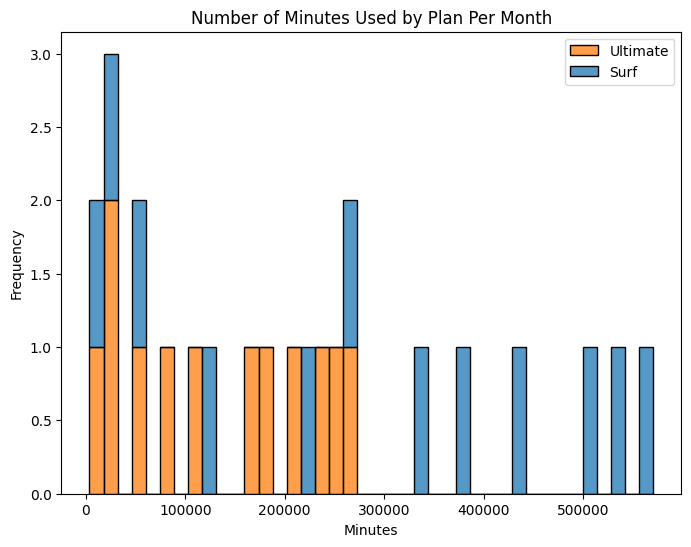

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=no_of_minutes_per_plan, x='minutes', hue='plan', multiple='stack', bins=40)
plt.title('Number of Minutes Used by Plan Per Month')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.legend(['Ultimate', 'Surf'])
plt.show()

#used seaborns 'sns.histblot' to create a stacked histogram for the data 

**NOTE:**

Calculated the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.

In [ ]:
# Calculated the mean and the variance of the monthly call duration
mean_and_var_of_call_duration = duplicate_mv_free_calls.groupby(['plan', 'call_month'])['minutes'].agg(['mean', 'var']).reset_index()
mean_and_var_of_call_duration

# created a new dataframe 'mean_and_var_of_call_duration' to store the mean and variance for each month
# 'var' meaning variance 

,plan,call_month,mean,var
0,surf,2018-01,292.000000,0.000000
1,surf,2018-02,339.767857,84992.617857
2,surf,2018-03,352.909091,42760.839246
3,surf,2018-04,366.809942,61168.541484
4,surf,2018-05,456.660377,58169.876011
5,surf,2018-06,433.351575,47589.593797
6,surf,2018-07,469.824113,60779.176406
7,surf,2018-08,447.882214,50656.462525
8,surf,2018-09,450.067079,44790.723801
9,surf,2018-10,471.476323,50048.837032


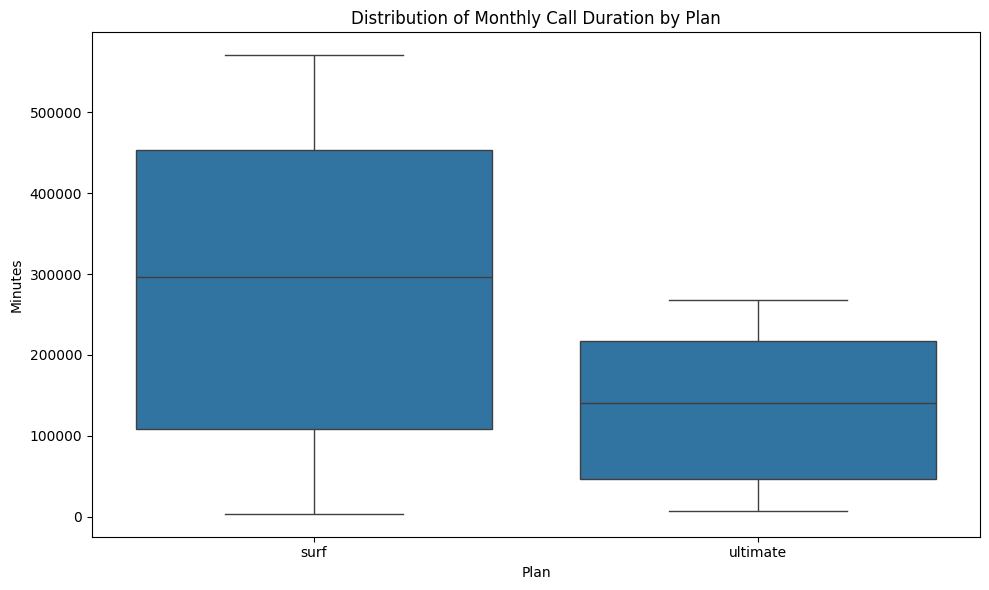

In [ ]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=no_of_minutes_per_plan, x='plan', y='minutes')
plt.title('Distribution of Monthly Call Duration by Plan')
plt.xlabel('Plan')
plt.ylabel('Minutes')
plt.tight_layout()
plt.show()

# used seaborns 'sns.boxplot' to create a visual representation of the monthly call duration 

### Call Conclusions: 
Overall the calling behaviour points to the surf plan having a longer call duration when we look at the number of minutes they are also spread over a much larger range of values this is most likely due to the fact that there are more users of the surf plan, for all of the months of the year (accept February) the surf users have a higher average call time per month. This is probably a result of the volume of calls of surf users being much higher as there are many more surf users than ultimate users. The last few months of the year (August - December) the average call time is much closer, this indicates that users of the ultimate plan are taking advantage of the extra minutes that their plan offers. 

### Messaging Behaviour:

In [ ]:
no_of_messages_per_plan = duplicate_mv_free_messages.groupby(['plan', 'message_month'])['messages'].sum().reset_index()
no_of_messages_per_plan

# used 'groupby()' and 'sum()' to get the total number of messages per month 
# stored these values in new df 'no_of_messages_per_plan' with 'no' meaning number

,plan,message_month,messages
0,surf,2018-01,252.0
1,surf,2018-02,1246.0
2,surf,2018-03,3725.0
3,surf,2018-04,8372.0
4,surf,2018-05,16284.0
5,surf,2018-06,19968.0
6,surf,2018-07,25521.0
7,surf,2018-08,32903.0
8,surf,2018-09,38088.0
9,surf,2018-10,44717.0


In [ ]:
monthly_messages_pivot = no_of_messages_per_plan.pivot(index='message_month', columns='plan', values='messages')
monthly_messages_pivot

# created a pivot table, 'monthly_messages_pivot' for easier analysis and plotting later on 

plan,surf,ultimate
message_month,,
2018-01,252.0,744.0
2018-02,1246.0,1556.0
2018-03,3725.0,2687.0
2018-04,8372.0,4683.0
2018-05,16284.0,8798.0
2018-06,19968.0,11828.0
2018-07,25521.0,15470.0
2018-08,32903.0,20121.0
2018-09,38088.0,22039.0


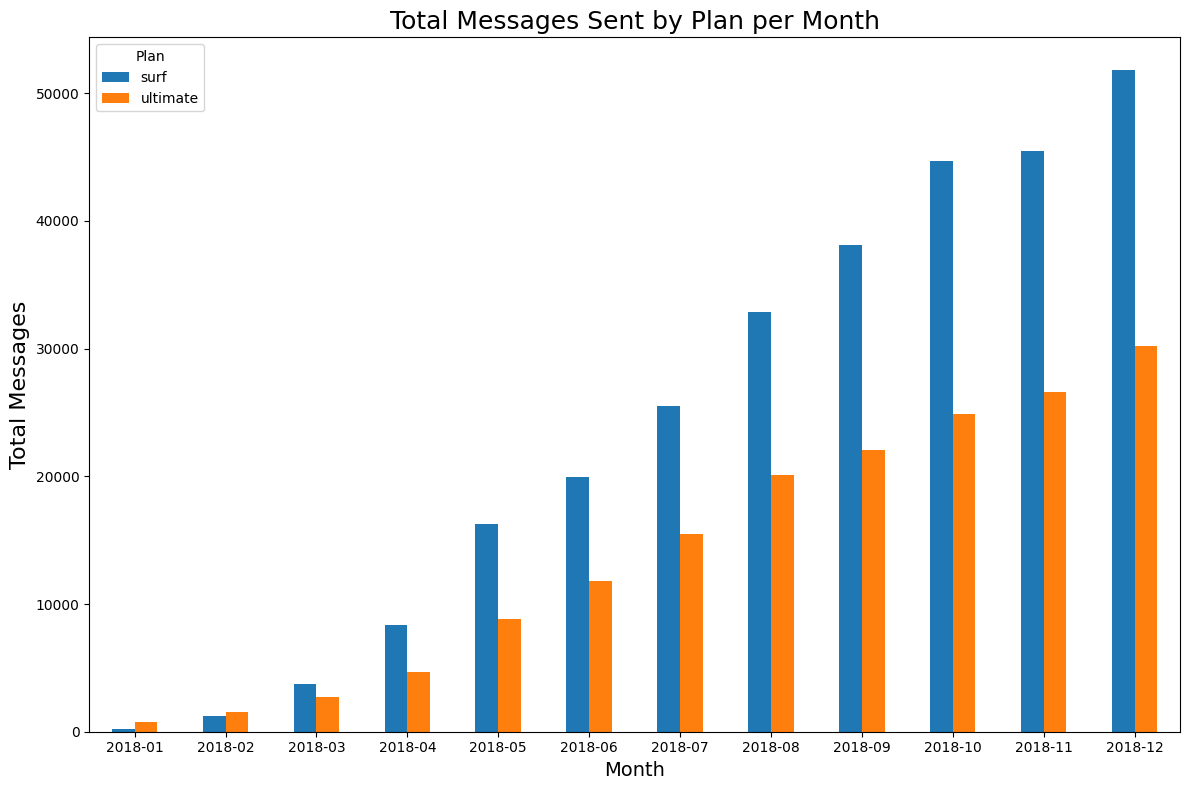

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
monthly_messages_pivot.plot(kind='bar', ax=ax)
plt.title('Total Messages Sent by Plan per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Messages', fontsize=16) 
plt.xticks(rotation=0)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

# created a bar graph to get a picture of the total messages sent by each user per month 

## Message Conclusions: 
Can see that the total messages were definitively higher for the surf plan and that for both the surf and the ultimate plan have increased in a linear fashion which means out of our 500 users only a small fraction of them were clients of Megaline at the beginning of the year, this indicates good growth with regards to both plans as well as in the volume of text messages. With the exception of January, the surf plan has a much higher count of text messages per month. This is once again caused not only by a higher volume of texts but also the fact that there are many more users of the surf plan overall. This points to the surf plan being more lucrative with regards to messages as the text limits are far lower than the ultimate plan and the tendency to exceed the limit is more likely. 

## Internet Usage Behaviours: 

In [ ]:
# Compared the amount of internet traffic consumed by users per plan
total_traffic_per_month = duplicate_mv_free_data_usage.groupby(['plan', 'session_month'])['data_used'].sum().reset_index()
total_traffic_per_month

# used 'groupby()' and 'sum()' to get the total internet traffic of each plan per month 

NameError: name 'duplicate_mv_free_data_usage' is not defined

In [ ]:
monthly_internet_pivot = total_traffic_per_month.pivot(index='session_month', columns='plan', values='data_used')
monthly_internet_pivot

# created a pivot table, 'monthly_internet_pivot' for easier analysis and plotting later on 

plan,surf,ultimate
session_month,,
2018-01,8.00000,21.00000
2018-02,46.59978,100.00000
2018-03,198.01238,176.01318
2018-04,426.40887,232.00000
2018-05,787.15644,356.00000
2018-06,1093.02133,574.01062
2018-07,1512.00801,777.56987
2018-08,2085.34477,1020.63395
2018-09,2444.90757,1164.02852


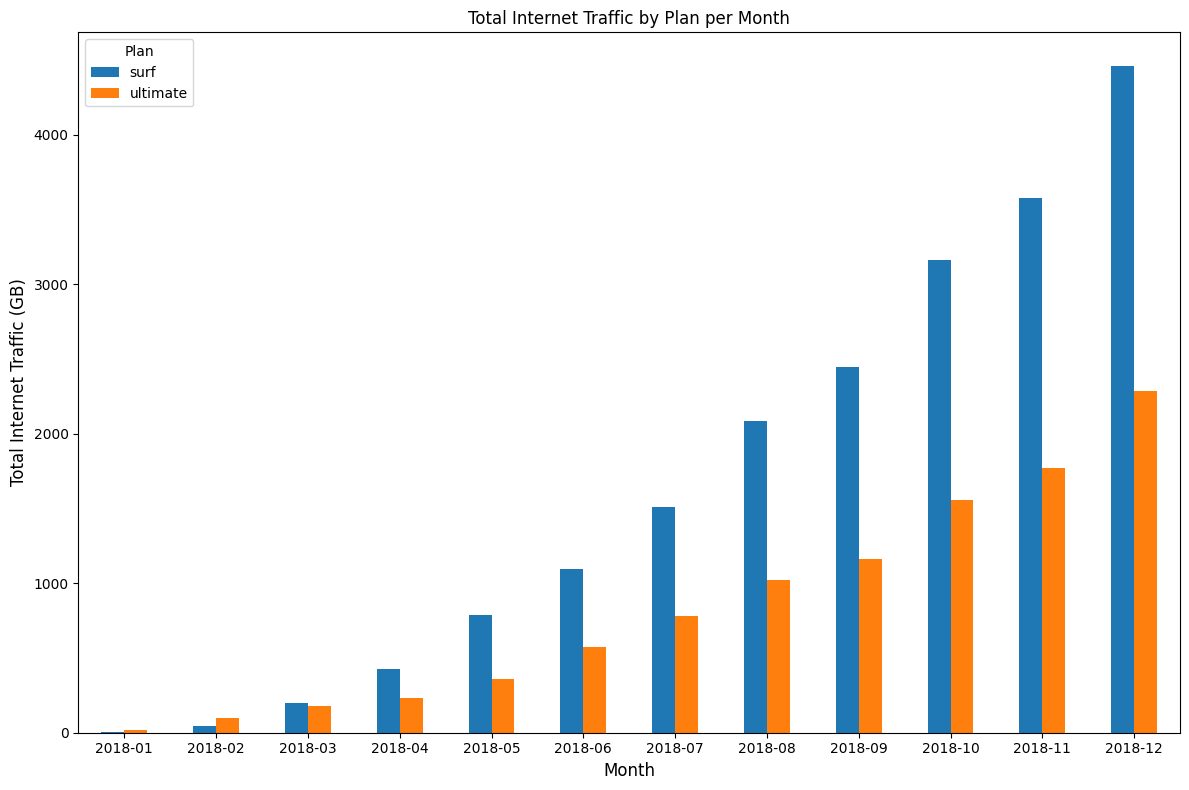

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
monthly_internet_pivot.plot(kind='bar', ax=ax)
plt.title('Total Internet Traffic by Plan per Month')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Internet Traffic (GB)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

## Internet Usage Conclusions: 
Can see from our internet traffic that once again there were very few users out of the 500 in the dataset that were using the plans at the beginning of the year. This again shows great growth for Megaline and that the users of the surf plan seemingly tend to use more internet overall, likely skewed by the fact that there are more users of the surf plan. There were presumably more users of the ultimate plan at the beginning of the year as January was the only month when the ultimate plan users internet traffic exceeded the surf users. This indicates that the surf plan is more lucrative overall for Megaline with regard to internet usage as the low internet limit is more often exceeded than the ultimate plan but we cannot say definitively because the internet volume per user per month is affected by the amount of users for each respective plan.

## Revenue Statistics: 

In [ ]:
plan_revenue_stats = duplicate_mv_free_revenue.groupby('plan')['monthly_revenue'].describe()
plan_revenue_stats

# used 'groupby()' and 'describe()' functions to get the statistics for each plan and their revenue
# stored results in df 'plan_revenue_stats' 

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,799.0,68.637958,56.873796,20.0,20.0,50.0,90.0,580.0
ultimate,161.0,77.697044,20.205237,70.0,70.0,70.0,70.0,189.0


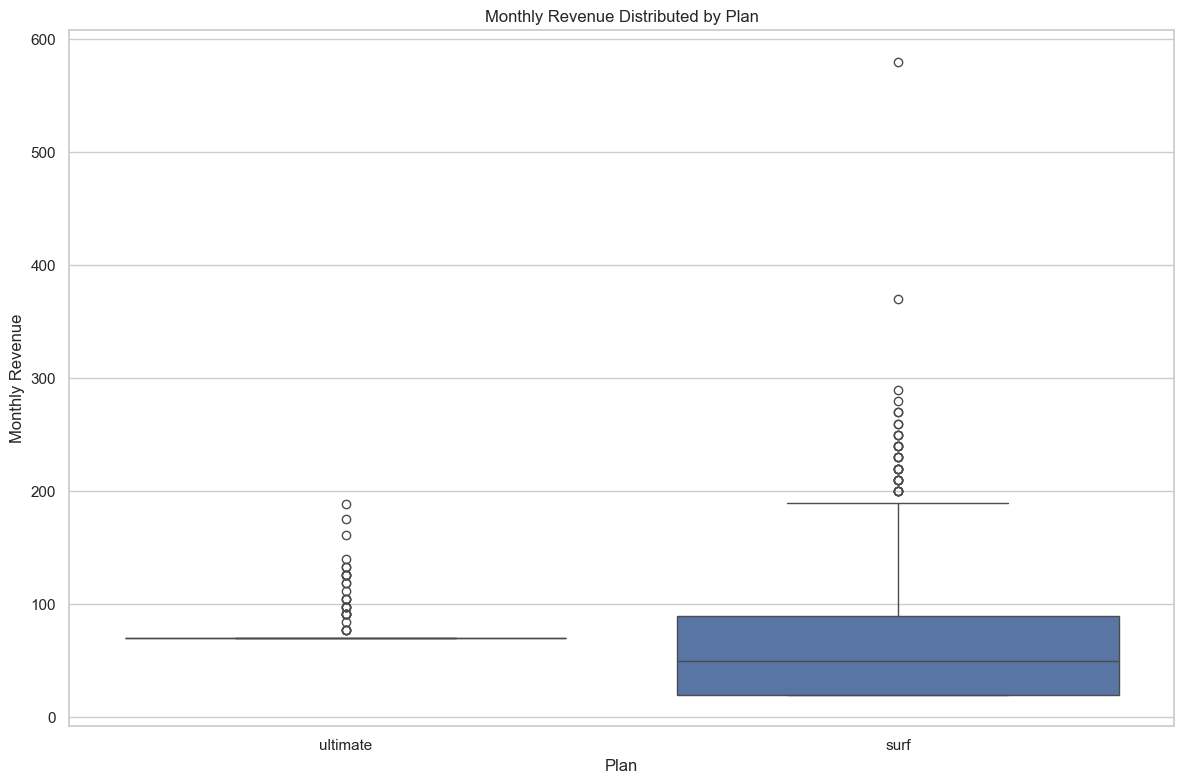

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.boxplot(data=duplicate_mv_free_revenue, x='plan', y='monthly_revenue')
plt.title('Monthly Revenue Distributed by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
plt.tight_layout()
plt.show()

# used seaborn's 'sns.boxplot' to create a boxplot that shows the distribution of revenue for each plan 

## Revenue Conclusions: 
Seemingly the surf plan brings in more revenue likely as a result of multiple factors. Presumably the fact that there are many more users of the surf plan plays a significant role in the fact that it appears to bring more revenue to Megaline. There is also the fact that in terms of the amount of calls per month, the total text messages per month and the internet traffic the users of the surf plan exceed the users of the ultimate plan. Which means that there is a distinct possibility that a large majority of the surf users are exceeding the limits of their plans and having to pay extra money where as users of the ultimate plan are not often exceeding their plan limits.

## Test statistical hypotheses

[Testing the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

- **Null hypothesis:** There is no difference in average revenue between the plans
- **Alt hypothesis:** There is a difference between the 2 plans 

In [ ]:
# Test the hypotheses

ultimate_revenue = duplicate_mv_free_revenue[duplicate_mv_free_revenue['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = duplicate_mv_free_revenue[duplicate_mv_free_revenue['plan'] == 'surf']['monthly_revenue']
t_stat, p_value = st.ttest_ind(ultimate_revenue, surf_revenue)
alpha = 0.05
print(f"p-value: {p_value}")
print(f"t-statistic: {t_stat}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue.")
else: 
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue.")

# used a 'ttest' to test whether or not the average revenue of each plan differs significantly 

p-value: 0.04630841828379599
t-statistic: 1.9951590067773137
Reject the null hypothesis: There is a significant difference in average revenue.


In [ ]:
ultimate_revenue.mean()

# printed the mean for the ultimate revenue to see the difference from surf

np.float64(77.6970443478261)

In [ ]:
surf_revenue.mean()

# printed mean for surf revenue to see difference to ultimate 

np.float64(68.63795757196496)

[Testing the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

- **Null hypothesis:** There is no difference in average revenue between NY-NJ are and users from other regions
- **Alt hypothesis:** There is a difference between the average revenue from NY-NJ area and users from other regions.

In [ ]:
# Test the hypotheses
ny_nj_revenue = duplicate_mv_free_revenue[duplicate_mv_free_revenue['city'] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]['monthly_revenue']
other_revenue = duplicate_mv_free_revenue[duplicate_mv_free_revenue['city'] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]['monthly_revenue']
if len(ny_nj_revenue) > 0 and len(other_revenue) > 0:
    t_stat, p_value = ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant difference in average revenue.")
else:
    print(f"Fail to reject the null hypothesis: No significant difference in average revenue between NY-NJ and other regions.")

T-statistic: -1.9471324872110125, P-value: 0.05253817221229917
Fail to reject the null hypothesis: No significant difference in average revenue between NY-NJ and other regions.


In [ ]:
ny_nj_revenue.mean()

# printed average revenue for users in New York/New Jersey to see difference to other revenue average

np.float64(63.81360920245399)

In [ ]:
other_revenue.mean()

# printed the average for the other revenue to see difference to NY/NJ area

np.float64(71.45462225846926)

## Statistical Hypotheses Conclusions: 
It is evident from our statistical test on the average revenue of the surf and ultimate plans that there is a significant difference in average revenue of both plans with the ultimate plan bringing having a higher average revenue and we can reject the idea that there is no difference between the plans average revenue. The probability is too low (around 4%) that there isn't a difference between the 2 means that is the same or larger, this falls below our alpha value of 0.05. Also know that the New York and New Jersey area users although they have a lower grouped average than the rest of the Megaline clients do not have a significant difference in revenue and there is just over 5% chance of the difference between the 2 means being the same or larger which is slightly too high given our citical value of 0.05 to outright reject that there is a major difference between the means of both populations.  

## General conclusion

After fully analysing the data in all aspects from calls (volume and duration), text messages, internet usage and revenue for each plan we can conclude that the surf plan is the more lucrative plan overall for Megaline as of 2018 however their . Not only are more users drawn to the plan and its low monthly payment (far more people use the surf plan in our dataset of 500) but the low limits on call minutes, text messages and internet data mean that the majority of surf users seem to greatly exceed their plan limits on a monthly basis. The average monthly revenue for users of the surf plan does not exceed the ultimate users who bring in slightly more per user and exceed their limits by about eight dollars, however the number of users and the fact that the surf users on average tend to exceed the plan limit by over 40 dollars helps to point to the surf plan being more lucrative overall despite the fact that per user they bring in slightly less per month on averave than the ultimate plan. This means that as it stands the surf plan is better annually for Megaline from a money making standpoint but if they boosted the numbers for users of the ultimate plan to be on par with the surf users it would be the more lucrative plan 